In [49]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import random
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
np.random.seed(42)

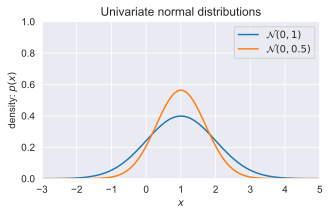

In [50]:
def unidimentional_gauss(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

#Unidimentional Normals
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
   x, unidimentional_gauss(x, mean=1, variance=1), 
   label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, unidimentional_gauss(x, mean=1, variance=0.5), 
    label="$\mathcal{N}(0, 0.5)$")
plt.xlabel('$x$', fontsize=10)
plt.ylabel('density: $p(x)$', fontsize=10)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()

In [51]:
def multidimential_gauss(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [52]:
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-10, 10, num=nb_of_x)
    x2s = np.linspace(-10, 10, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multidimential_gauss(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  

In [53]:
def creating_distributions(mean1, mean2, covar, d):
    bidimentional_mean = np.matrix([[mean1], [mean2]])  # Mean
    bidimentional_covariance = np.matrix([
    [covar, 0.], 
    [0., covar]])  # Covariance
    x1, x2, p = generate_surface(
        bidimentional_mean, bidimentional_covariance, d)
    
    fig, axs = plt.subplot(1, 1, figsize=(8,4))
    con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
    axs.set_xlabel('$x_1$', fontsize=10)
    axs.set_ylabel('$x_2$', fontsize=10)
    axs.axis([-10, 10, -10, 10])
    axs.set_aspect('equal')
    axs.set_title('Distribution', fontsize=13)
    
    # Add colorbar and title
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(con, cax=cbar_ax)
    cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=10)
    plt.show()


In [63]:
def setting_mean_covariance(mu1,sigma1,mu2,sigma2,mu3,sigma3):
    d=2
    with open ('DataSet.csv', mode='w') as Random_Gauss_Distributions:
        fieldnames = ['Mean1','Mean2', 'Covariance']
        writer=csv.DictWriter(Random_Gauss_Distributions,fieldnames=fieldnames)
        writer.writeheader()

        for i in range (500):
            temp1 = random.gauss(mu1, sigma1) #First mean
            str_temp1=str(temp1)

            temp2 = random.gauss(mu2, sigma2) #second mean
            str_temp2=str(temp2)

            temp3 = random.gauss(mu3, sigma3) #covariance
            str_temp3=str(temp2)

            writer.writerow({'Mean1':str_temp1,'Mean2':str_temp2,'Covariance':str_temp3})

In [69]:
def read_dis():
    d=2
    with open ('DataSet.csv', mode='w') as Random_Gauss_Distributions:
        csv_reader=csv.DictReader(Random_Gauss_Distributions)

        linecount=0
        for row in csv_reader:
            if linecount != 0:
                creating_distributions(row['Mean1'], row['Mean2'],row['Covariance'], d)
                linecount+=1

In [70]:
mu1 = 10
sigma1 = 5
mu2=20
sigma2=10
mu3=10
sigma3=2

setting_mean_covariance(mu1,sigma1,mu2,sigma2,mu3,sigma3)
read_dis()


   
    

UnsupportedOperation: not readable